# Inferencia y contraste de hipótesis en dos poblaciones

En esta práctica vamos a centrarnos en aplicar conceptos de contraste de inferencia y contraste de hipótesis a conjuntos de datos reales. En este caso, vamos a dar un golpe de timón y trabajaremos con Python y con sus herramientas asociadas. Las razones detrás de esta elección son varias:
*   Python es uno de los lenguajes de programación más populares en los últimos años, con múltiples aplicaciones a campos como la estadística, la inteligencia artificial, y la ciencia de datos. Además, también es un lenguaje multipropósito que puede emplearse para la construcción de muchos tipos de aplicaciones. Esto hace de su aprendizaje una herramienta versátil que puede ser útil en más de un contexto.
*   La realidad laboral del científico de datos supone principalmente trabajar con dos tecnologías reinantes en el ecosistema: Python y R. Pese a que R está más orientado al análisis estadístico, queremos aprovechar vuestro bagaje en Python dado el ajustado calendario de prácticas.
*  Existen multitud de paquetes (¡y van aumentando!) para facilitar el trabajo del analista y el científico de datos. En esta práctica trabajaremos con algunos de ellos.

# Instalando los paquetes de Python adecuados e importándolos

Primero que nada, instalaremos algunos paquetes de Python que necesitaremos para la práctica. Aunque estos no vienen instalados por defecto en el entorno de Google Colab, pueden ser instalados fácilmente con *pip install nombre_paquete*. Además, importaremos algunas funciones y paquetes que sí están instalados por defecto en Google Colab como ahora *Pandas*, *Seaborn*, *Matplotlib*, o *Scipy*.

El siguiente fragmento de código realiza estas instalaciones e importaciones. Asegúrate de ejecutarlo cada vez que inicies este notebook de nuevo.

In [180]:
!pip install researchpy
!pip install statsmodels
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import requests
import io
import math
from scipy import stats
import numpy as np
import researchpy as rp
import statsmodels.api as sm

# Cargando un archivo CSV desde Internet

Los archivos CSV (*comma separated value*) son formatos de fichero plano que se emplean para representar datos estructurados tabularmente (i.e., en forma de tabla). Para esta práctica vamos a utilizar un conjunto de datos procedente del juego FIFA 2020. Éste contiene información sobre jugadores de fútbol de diferentes ligas, así como los atributos de valoración de estos jugadores en el videojuego FIFA. Estas valoraciones han sido dadas por un grupo de expertos en fútbol, que son parte del equipo de trabajo de EA Sports.

El conjunto de datos se encuentra en un repositorio de Git, pero podemos cargarlo fácilmente con ayuda del paquete *requests* (empleado para realizar peticiones HTTP) y a través de *Pandas*. Éste último es un paquete de Python especializado en la representación, transformación, y análisis de datos tabulares. 

El siguiente fragmento de código carga el conjunto de datos en un *Dataframe*, que es la clase empleada en Pandas para el almacenamiento de datos tabulares. Ejecuta el código para cargar el conjunto de datos.

In [97]:
string_csv = requests.get("https://gitlab.com/drvicsana/ciencia-datos/-/raw/master/datasets/fifa/players_20.csv").content
string_stream = io.StringIO(string_csv.decode("utf-8"))
player_df = pd.read_csv(string_stream)

# Describiendo la forma general de un conjunto de datos

Bien, ya hemos cargado el conjunto de datos en nuestro notebook, y éste ha quedado almacenado en un *Dataframe* al que hemos nombrado como *player_df*. Éste contiene la información de todos los jugadores de fútbol presentes en el videojuego FIFA 2020. Normalmente, una vez hemos cargado un conjunto de datos resulta interesante visualizar parte de sus contenidos para hacernos una idea del tipo de valores ante los cuales nos encontramos. Podemos analizar la cabecera (i.e., los primeros registros del *Dataframe* o tabla) a partir del método *head*. Ejecuta el siguiente fragmento de código.

In [98]:
player_df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,...,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,...,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,...,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,...,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,...,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,2024.0,LF,10.0,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,...,54,41,87,89,88,91,34,27,22,11,12,6,8,8,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,83+3,83+3,83+3,89+3,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


Como vemos, el *Dataframe* contiene información muy variada sobre cada uno de los jugadores de fútbol como ahora su nombre, edad, peso, altura, club de procedencia, posición, y las valoraciones del jugador en diferentes aspectos de juego. Si nos fijamos en la última fila de información aportada por el método *head*, veremos que hay un total de 104 columnas. No te preocupes, para esta práctica únicamente trabajaremos con un subconjunto de ellas.

Como habrás podido observar, los datos están organizados de forma tabular. Esta representación de datos es muy cómoda cuando trabajamos con datos estructurados (i.e., todos tienen el mismo esquema) ya que estamos habituados a trabajar con esta abstracción en otros contextos como hojas de cálculo o bases de datos de tipo SQL. No obstante, el mundo se vuelve algo más complicado si tuviéramos que trabajar con datos no estructurados.

Hemos visto cuántas columnas tiene cada registro de nuestro conjunto de datos, pero no sabemos nada del número de registros con el que contamos. Podemos solicitarle al *Dataframe* esta información con el atributo *shape*. Éste contiene el número de filas y de columnas del conjunto de datos. 

In [99]:
player_df.shape

(18278, 104)

# Filtrando datos de un *Dataframe*

Como habrás podido observar, el conjunto de datos cuenta con casi cerca de 20 mil jugadores de fútbol. Para esta práctica no vamos a trabajar con este conjunto de datos tan grande, sino que trabajaremos con un subconjunto: los jugadores de la primera división española. Para conseguir trabajar con este conjunto reducido, tendremos que filtrar los registros con los que contamos. Esta no es una tarea complicada en *Pandas*, como veremos en este y en algunos ejemplos posteriores.

Primero que nada, vamos a crearnos una lista con los nombres de los conjuntos de la primera división española. Esta lista está compuesta por cada uno de los nombres de los equipos de la primera división.

In [100]:
spanish_teams = ["Real Madrid", "FC Barcelona", "Atlético Madrid", "Valencia CF", "Villarreal CF", "Real Valladolid CF", 
                 "Athletic Club de Bilbao", "Cádiz CF", "Granada CF", "Real Betis", "RCD Espanyol", "Real Sociedad", "Deportivo Alavés", "Elche CF", "Sevilla FC", 
                 "CA Osasuna", "SD Eibar", "RC Celta", "Levante UD", "SD Huesca" ]

Para filtrar un *Dataframe* y quedarnos únicamente con aquellos registros que cumplen una determinada condición empleamos la siguiente sintáxis:

```
dataframe[ conjunto de booleanos ]
```

Debemos proporcionar un conjunto de valores booleanos, uno por cada registro del *Dataframe*, donde *True* indica que queremos conservar el registro y *False* que no queremos conservarlo. Hay múltiples formas de generar esa lista de booleanos de acuerdo a nuestro propósito. 

En *Pandas* podemos acceder directamente a los datos de una columna con diversas notaciones:

```
dataframe[ "nombre de la columna" ]
dataframe.nombre_de_la_columna
```

Podemos determinar si cada uno los valores de una columna cumplen con una determinada condición o no. Por ejemplo:

```
dataframe.nombre_de_la_columna == "Valencia CF"
dataframe.nombre_de_la_columna > 23
```

Esto genera un conjunto de booleanos con valores de cierto o falso dependiendo de si cada uno de los registros cumplen con la condición o no. Veamos ahora cómo vamos a filtrar los datos de nuestro conjunto para quedarnos únicamente con aquellos jugadores que pertenecen a la primera división. 

In [101]:
spanish_players_df = player_df[ player_df.club.isin(spanish_teams) ]

Fíjate que usamos el método *isin* para la columna seleccionada. Este método devuelve un conjunto de valores booleanos. *True* cuando el valor de la columna se encuentra en el conjunto pasado como parámetro al método *isin* y *False* en caso contrario. Con esto filtraremos el *Dataframe*, pero debemos guardarlo en otra variable para poder trabajar con este nuevo *Dataframe*. En este caso, lo guardamos en la variable *spanish_players_df*. Explora la cabecera de este nuevo *Dataframe* con el método *head*.

In [102]:
# Tu código aquí
spanish_players_df.head(5)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,...,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,...,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,...,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,2024.0,LF,10.0,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,...,54,41,87,89,88,91,34,27,22,11,12,6,8,8,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,83+3,83+3,83+3,89+3,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
6,192448,https://sofifa.com/player/192448/marc-andre-te...,M. ter Stegen,Marc-André ter Stegen,27,1992-04-30,187,85,Germany,FC Barcelona,90,93,67500000,250000,GK,Right,3,4,1,Medium/Medium,Normal,Yes,143400000.0,NaN,GK,1.0,NaN,2014-07-01,2022.0,SUB,22.0,NaN,NaN,NaN,NaN,NaN,NaN,88.0,85.0,88.0,...,43,22,11,70,25,70,25,13,10,88,85,88,88,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,177003,https://sofifa.com/player/177003/luka-modric/2...,L. Modrić,Luka Modrić,33,1985-09-09,172,66,Croatia,Real Madrid,90,90,45000000,340000,CM,Right,4,4,4,High/High,Lean,Yes,92300000.0,"#Dribbler, #Playmaker , #Crosser, #Acrobat, #...",RCM,10.0,NaN,2012-08-01,2020.0,NaN,NaN,74.0,76.0,89.0,89.0,72.0,66.0,NaN,NaN,NaN,...,62,82,79,91,82,92,68,76,71,13,9,7,14,9,77+3,77+3,77+3,84+3,83+3,83+3,83+3,84+3,86+3,86+3,86+3,85+3,87+3,87+3,87+3,85+3,81+3,81+3,81+3,81+3,81+3,79+3,72+3,72+3,72+3,79+3


# Resumiendo los valores de nuestras columnas

En muchos casos, querremos resumir la información de cada una de nuestras columans del *Dataframe* en forma de medidas descriptivas. El método *describe* nos permite obtener estas medidas descriptivas para las columnas de tipo numéricas. Más concretamente, obtiene información como la media, la desviación típica, el valor mínimo, primer cuartil, mediana, tercer cuartil, y el máximo.

In [103]:
spanish_players_df.describe()

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,6.140000e+02,614.000000,614.000000,614.000000,614.000000,5.770000e+02,614.000000,614.000000,59.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,216336.793160,25.161238,180.749186,74.491857,73.071661,78.469055,9.078265e+06,32283.387622,1.364821,3.065147,2.653094,1.998753e+07,17.190554,2021.526059,10.983051,67.771739,59.273551,64.648551,68.682971,57.375000,65.978261,71.870968,69.403226,68.225806,72.548387,40.951613,70.274194,56.842020,52.610749,57.415309,66.648208,48.267101,61.933225,55.394137,48.457655,59.986971,66.232899,65.201954,64.970684,65.470684,69.420195,65.280130,64.705212,66.692182,64.283388,65.570033,54.053746,59.697068,52.684039,56.511401,60.382736,52.674267,65.566775,53.239414,52.796417,50.338762,16.812704,16.462541,16.301303,16.486971,16.763844
std,26997.672579,4.370866,6.435446,6.505295,7.181048,5.432203,1.241140e+07,60105.246065,0.738457,0.645469,0.880372,2.679938e+07,10.242787,1.396268,6.814011,12.201220,14.690126,10.476126,10.288358,17.860793,11.044189,8.669683,8.923095,8.112769,9.089135,11.379342,9.495762,19.575915,21.536341,18.943080,15.088213,19.220715,19.932196,20.091821,19.081110,15.678140,17.882145,14.899717,14.772968,13.852460,9.022682,13.995211,12.706477,12.146524,15.538023,13.293922,20.848996,18.132720,22.920058,21.450555,15.027276,16.655557,11.456903,20.851366,23.877869,23.749767,18.882718,18.220448,17.848157,18.542548,19.182508
min,45186.000000,17.000000,163.000000,56.000000,54.000000,62.000000,9.000000e+04,1000.000000,1.000000,1.000000,1.000000,1.620000e+05,1.000000,2020.000000,1.000000,31.000000,21.000000,35.000000,39.000000,16.000000,33.000000,56.000000,54.000000,46.000000,53.000000,16.000000,50.000000,9.000000,5.000000,9.000000,15.000000,5.000000,6.000000,10.000000,9.000000,14.000000,9.000000,16.000000,15.000000,22.000000,35.000000,22.000000,26.000000,30.000000,22.000000,29.000000,5.000000,15.000000,6.000000,4.000000,11.000000,9.000000,23.000000,6.000000,10.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,199618.250000,22.000000,176.000000,70.000000,68.000000,75.000000,1.100000e+06,6000.000000,1.000000,3.000000,2.000000,2.600000e+06,9.000000,2020.000000,5.500000,61.000000,50.000000,58.000000,63.000000,40.000000,59.000000,65.000000,62.000000,63.000000,65.250000,31.500000,62.000000,45.000000,37.000000,48.250000,62.000000,36.000000,56.000000,42.000000,35.000000,52.000000,63.000000,58.000000,58.000000,58.250000,63.000000,57.000000,56.000000,60.000000,56.250000,58.000000,41.000000,48.000000,29.0000

También podemos describir las columnas categóricas con el propio método *describe*, pero especificando que queremos la descripción de aquellos atributos de tipo categórico (i.e., *object* en Pandas).

In [104]:
spanish_players_df.describe(include=["object"])

,player_url,short_name,long_name,dob,nationality,club,player_positions,preferred_foot,work_rate,body_type,real_face,player_tags,team_position,loaned_from,joined,nation_position,player_traits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
count,614,614,614,614,614,614,614,614,614,614,614,89,614,37,577,59,324,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552
unique,614,606,614,579,52,20,137,2,8,5,2,37,21,24,227,18,152,68,68,68,72,72,72,72,72,68,68,68,71,60,60,60,71,69,73,73,73,69,74,84,84,84,74
top,https://sofifa.com/player/207732/roger-marti-s...,Joaquín,Felipe Augusto de Almeida Monteiro,1992-09-23,Spain,RC Celta,CB,Right,Medium/Medium,Normal,No,#Strength,SUB,Real Madrid,2019-07-01,SUB,Early Crosser,65+2,65+2,65+2,73+2,72+2,72+2,72+2,73+2,71+2,71+2,71+2,72+2,72+2,72+2,72+2,72+2,69+2,74+2,74+2,74+2,69+2,69+2,67+2,67+2,67+2,69+2
freq,1,3,1,2,413,33,86,448,295,355,375,22,238,6,57,26,20,26,26,26,31,25,25,25,31,26,26,26,28,29,29,29,28,27,23,23,23,27,31,20,20,20,31


La información proporcionada es el número de valores únicos en cada columna, el valor más repetido, y la frecuencia del valor más repetido.

# Creando nuevas columnas a partir de nuestro conjunto de datos

Muchas veces, es frecuente tener que transformar los registros existentes para generar nuevos atributos o columnas con información nueva y transformada. Esta nueva información puede ser útil para realizar nuevos análisis o puede ser más predictiva a la hora de incorporarla en un modelo de aprendizaje automático.

En este breve ejemplo vamos a crear una nueva columna llamada *main_position* que contendrá la posición principal del jugador de fútbol. También crearemos la columna *continent*, que contendrá el continente en el que nació el jugador. Las siguientes funciones permiten determinar la posición principal del jugador a partir de la  columna *player_positions*. 

In [105]:
defender_positions = [ "SW", "RWB", "LWB", "RB", "LB", "CB" ]
midfield_positions = [ "DM", "RW", "LW", "LM", "RM", "CM", "AM" ]
forward_positions = [ "CF", "RF", "LF", "ST" ]
goalkeeper_positions = ["GK"]

def from_string_position_to_list(positions_string):
  return positions_string.replace(" ", "").split(",")

def is_position(positions_string, prospective_positions):
  list_positions = from_string_position_to_list(positions_string)
  found = False
  for position in list_positions :
    if position in prospective_positions :
      found = True
  return found

def determine_main_position(positions_string):
  count_defender = 0
  count_midfield = 0
  count_forward = 0
  count_goalkeeper = 0
  list_positions = from_string_position_to_list(positions_string)
  for position in list_positions :
    if position in defender_positions :
      count_defender = count_defender + 1
    elif position in midfield_positions :
      count_midfield = count_midfield + 1
    elif position in forward_positions :
      count_forward = count_forward + 1
    elif position in goalkeeper_positions :
      count_goalkeeper = count_goalkeeper + 1
  
  return max( [ (count_defender, "DF"), (count_midfield, "MF"), (count_forward, "FW"), (count_goalkeeper, "GK") ] )[1]

is_defender = lambda s : is_position(s, defender_positions)
is_midfielder = lambda s : is_position(s, midfield_positions)
is_forward = lambda s : is_position(s, forward_positions)
is_goalkeeper = lambda s: is_position(s, goalkeeper_positions)

country_to_continent = { "Argentina": "America", "Slovenia": "Europe", "Belgium":"Europe", "Germany": "Europe", "Croatia":"Europe",
                        "Spain": "Europe", "Uruguay":"America", "France":"Europe", "Brazil":"America", "Costa Rica":"America",
                        "Netherlands":"Europe", "Wales": "Europe", "Colombia":"America", "Chile":"America", "Serbia":"Europe",
                        "Portugal":"Europe", "Ghana":"Africa", "Montenegro":"Europe", "Mexico":"America", "Denmark":"Europe",
                        "Central African Rep.":"Africa", "Czech Republic":"Europe", "Algeria":"Africa", "Israel":"Asia",
                        "England":"Europe", "Slovakia":"Europe", "Dominican Republic":"America", "Cameroon":"Africa",
                        "China PR":"Asia", "Japan":"Asia", "Russia":"Asia", "Norway":"Europe", "Turkey":"Asia",
                        "FYR Macedonia":"Europe", "Senegal":"Africa", "Morocco":"Africa", "Italy":"Europe",
                        "Ukraine":"Europe", "Korea Republic":"Asia", "Nigeria":"Africa", "Sweden":"Europe", "Venezuela":"America",
                        "Bosnia Herzegovina":"Europe", "Ivory Coast":"Africa", "Romania":"Europe", "Equatorial Guinea":"Africa",
                        "Ecuador":"America", "Albania":"Europe", "Mauritania":"Africa", "Benin":"Africa", "Switzerland":"Europe",
                        "DR Congo":"Africa"}




Veamos ahora cómo podemos crear nuevas columnas. Primero que nada, para crear una columna, necesitaremos un conjunto de datos con los nuevos valores para la columna a crear. Obviamente, necesitaremos un valor para cada registro o fila con la que contamos en nuestro conjunto de datos. Podemos aplicar una función a cada una de las filas para generar esta nueva información. Para ello, podemos emplear el método *apply* proporcionándole una función que se aplicará a cada una de las filas del *Dataframe*. La sintáxis es la siguiente:

```
dataframe.apply( funcion, axis=1 )
```
Como vemos, debemos pasar una función como parámetro. Esta función puede ser una función ya definida o una que definamos en el momento con la sintaxis de función lambda. La opción *axis=1* es importante para que esta función se aplique a nivel de fila. Veamos un ejemplo sencillo.

In [106]:
spanish_players_df.apply( lambda row: row.age*2, axis=1 )

0        64
3        52
4        56
6        54
8        66
         ..
16009    36
16594    40
16780    36
17006    48
17355    34
Length: 614, dtype: int64

Como vemos, la función proporcionada multiplica la edad en cada fila por dos. Se devuelven tantos valores como resultados de aplicar esta función a cada una de las filas del conjunto de datos. Este conjunto de datos podemos utilizarlo para crear una nueva columna con el método *assign*

```
dataframe.assign( nombre_columna= conjunto de datos para la nueva columna )
```

A este método se le debe proporcionar un nombre de columna, así como el conjunto de datos que asignaremos a la nueva columna. Este conjunto de datos puede proceder, por ejemplo, del resultado de aplicar el método *apply*. Veamos ahora como creamos las columnas para *main_position* y *continent* para nuestro *Dataframe*. Ojo, ¡debemos reasignar el *Dataframe* para guardar la nueva versión!

In [107]:
spanish_players_df = spanish_players_df.assign( main_position = spanish_players_df.apply( lambda row: determine_main_position(row.player_positions), axis=1 ) )
spanish_players_df = spanish_players_df.assign( continent = spanish_players_df.apply(lambda row: country_to_continent[row.nationality], axis=1) )

Ahora crea una nuevas columnas *is_defender* y *is_forward* de tipo booleano y que determine si el jugador es defensa y delantero respectivamente.

In [108]:
# Tu código aquí
# defensa
spanish_players_df = spanish_players_df.assign( is_defender = spanish_players_df.apply( lambda row : True if ("DF" == row.main_position) else False, axis=1 ))
# delantero
spanish_players_df = spanish_players_df.assign( is_forward = spanish_players_df.apply( lambda row : True if ("FW" == row.main_position) else False, axis=1 ))
spanish_players_df.head()


,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,main_position,continent,is_defender,is_forward
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,...,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2,FW,America,False,True
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,...,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK,Europe,False,False
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,2024.0,LF,10.0,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,...,88,91,34,27,22,11,12,6,8,8,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,83+3,83+3,83+3,89+3,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3,MF,Europe,False,False
6,192448,https://sofifa.com/player/192448/marc-andre-te...,M. ter Stegen,Marc-André ter Stegen,27,1992-04-30,187,85,Germany,FC Barcelona,90,93,67500000,250000,GK,Right,3,4,1,Medium/Medium,Normal,Yes,143400000.0,NaN,GK,1.0,NaN,2014-07-01,2022.0,SUB,22.0,NaN,NaN,NaN,NaN,NaN,NaN,88.0,85.0,88.0,...,25,70,25,13,10,88,85,88,88,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK,Europe,False,False
8,177003,https://sofifa.com/player/177003/luka-modric/2...,L. Modrić,Luka Modrić,33,1985-09-09,172,66,Croatia,Real Madrid,90,90,45000000,340000,CM,Right,4,4,4,High/High,Lean,Yes,92300000.0,"#Dribbler, #Playmaker , #Crosser, #Acrobat, #...",RCM,10.0,NaN,2012-08-01,2020.0,NaN,NaN,74.0,76.0,89.0,89.0,72.0,66.0,NaN,NaN,NaN,...,82,92,68,76,71,13,9,7,14,9,77+3,77+3,77+3,84+3,83+3,83+3,83+3,84+3,86+3,86+3,86+3,85+3,87+3,87+3,87+3,85+3,81+3,81+3,81+3,81+3,81+3,79+3,72+3,72+3,72+3,79+3,MF,Europe,False,False


# Estadística descriptiva para datos categóricos

Ya sabemos algo más de nuestro conjunto de datos, y también como podemos transformarlo para crear nuevos atributos en nuestros registros. Quizás es hora de analizar nuestras variables categóricas de una forma un poco más detallada. Vamos a ver como podemos aplicar algunas técnicas comúnmente aplicadas en estadística descriptiva. Comenzaremos con la estadística descriptiva para datos categóricos.

Podemos contar las repeticios de cada uno de los valores de una variable categórica empleando el método *value_counts*. Este debe ser aplicado a una columna de tipo categórico. Por ejemplo, en el siguiente fragmento de código contamos las repeticiones de cada una de las posibles posiciones de lo jugadores.

In [109]:
spanish_players_df.main_position.value_counts()

MF    295
DF    189
FW     68
GK     62
Name: main_position, dtype: int64

También podemos especificar que en vez de la frecuencia absoluta, queremos visualizar la frecuencia relativa. Esto se consigue con el parámetro *normalize=True*.

In [110]:
spanish_players_df.main_position.value_counts(normalize=True)

MF    0.480456
DF    0.307818
FW    0.110749
GK    0.100977
Name: main_position, dtype: float64

A veces resulta más informativo representar esta misma información en forma de un gráfico de tartas o *pie chart*. A partir de la información obtenida de *value_counts* podemos construir fácilmente un gráfico de tartas. En el siguiente ejemplo se muestra cómo construir un gráfico de tartas.

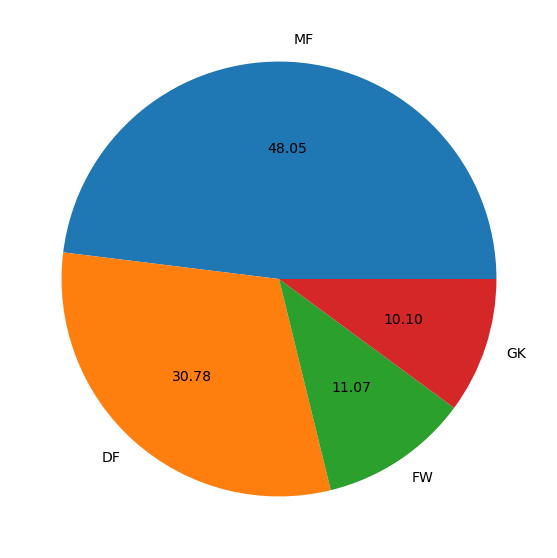

In [111]:
count_data = spanish_players_df.main_position.value_counts()
plt.figure(figsize=(10, 10))
fig = plt.pie( count_data, labels = count_data.index, autopct="%.2f", textprops={"fontsize":14} )

*plt* es un objeto de tipo *pyplot* que pertenece al paquete *Matplotlib*. Éste paquete se especializa en la construcción de gráficas de visualización en Python. Es bastante frecuente que, como parte del trabajo como científico de datos, tengamos que visualizar datos con este paquete de Python. En esta práctica vamos a ver algunos ejemplos. El método *pie* es el que nos permite construir el gráfico de tartas. A éste el proporcionamos los datos procedentes de *value_counts* y en labels se proporciona la etiqueta para cada uno de los datos.

Con lo que sabes ahora, crea un gráfico de tartas para el atributo *continent*. **¿De qué continente son más frecuentemente los jugadores de la liga española? ¿Y qué otro continente es el más frecuente? ¿tiene sentido?**

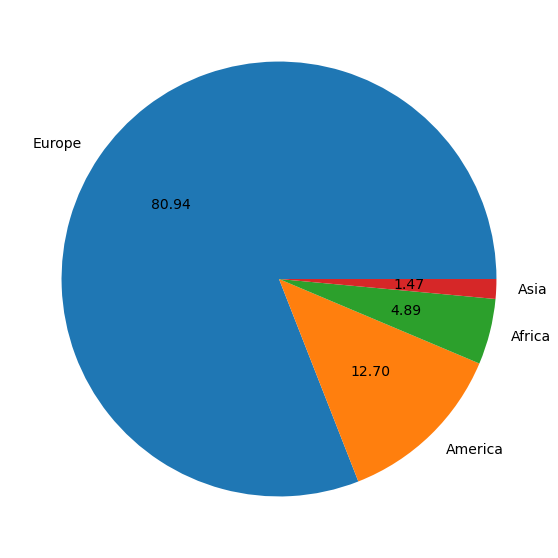

In [112]:
# Tu código aquí
count_data = spanish_players_df.continent.value_counts()
plt.figure(figsize=(10,10))
fig = plt.pie( count_data, labels = count_data.index, autopct="%.2f", textprops={"fontsize":14} )

Otra forma alternativa de visualizar esta información es a partir de un gráfico de barras. Podemos construir estos gráficos con *Matplotlib*, pero en este caso nos apoyaremos en *Seaborn*, un paquete de Python que trabaja sobre *Matplotlib* y que facilita algo más la construcción de algunas gráficas algo más complejas. El siguiente ejemplo construye un gráfico de barras con las posiciones de los jugadores en la liga y sus frecuencias relativas. A ojos de este gráfico, **¿qué posición es más frecuente en nuestra muestra? ¿tiene sentido?** La más frecuente es la de MF, tiene sentido ya que es donde más jugadores se acumulan en un partido.

Text(0.5, 1.0, 'Player positions')

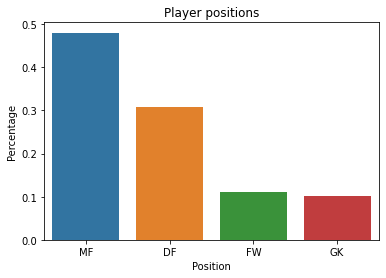

In [113]:
count_data = spanish_players_df.main_position.value_counts(normalize=True)
axes = sns.barplot( x=count_data.index, y=count_data )
axes.set_xlabel("Position")
axes.set_ylabel("Percentage")
axes.set_title("Player positions")

En *sns* hemos importado el paquete *Seaborn*. A través de este objeto creamos un gráfico de barras con el método *barplot* proporcionando en el eje x los posibles valores de la variable categórica, y en el eje y los valores de frecuencias relativas.

Ahora, **¿serías capaz de crear un gráfico de barras para el continente de los jugadores?**

Text(0.5, 1.0, 'Player continent')

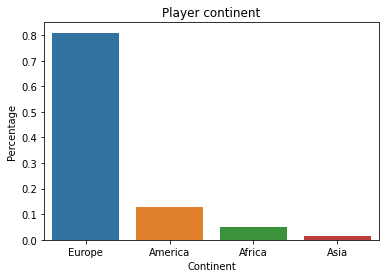

In [114]:
# Tu código aquí
count_data = spanish_players_df.continent.value_counts(normalize=True)
axes = sns.barplot( x=count_data.index, y=count_data )
axes.set_xlabel("Continent")
axes.set_ylabel("Percentage")
axes.set_title("Player continent")

Estas gráficas nos permiten describir de forma individual una variable categórica en nuestra muestra. A veces es interesante estudiar cómo se comportan de forma conjunta dos o más variables. Una forma de describir este comportamiento en nuestra muestra es a través de las tablas de contingencia, como bien conoceréis de teoría.

La construcción de estas tablas en *Pandas* es muy sencillo a través del método *crosstab*. A éste se le proporciona primero la variable categórica que emplearemos en las filas y tras ello la variable categórica que emplearemos para las columnas. Por defecto, calcula la frecuencia absoluta para cada combinación de valores de la variable aleatoria de las filas y de la variable aleatoria de las columnas.

In [115]:
pd.crosstab( spanish_players_df.preferred_foot, spanish_players_df.main_position )

main_position,DF,FW,GK,MF
preferred_foot,,,,
Left,56,10,8,92
Right,133,58,54,203


También se puede obtener la frecuencia relativa empleando el parámetro *normalize=True*.

In [116]:
pd.crosstab( spanish_players_df.preferred_foot, spanish_players_df.main_position, normalize=True )

main_position,DF,FW,GK,MF
preferred_foot,,,,
Left,0.091205,0.016287,0.013029,0.149837
Right,0.216612,0.094463,0.087948,0.330619


También podemos obtener las frecuencias condicionales de cada valor de la variable columnar condicionadas al valor de la variable aleatoria de las filas. Esto se consigue con el atributo *normalize=index*. 

In [117]:
pd.crosstab( spanish_players_df.preferred_foot, spanish_players_df.main_position, normalize = "index" )

main_position,DF,FW,GK,MF
preferred_foot,,,,
Left,0.337349,0.060241,0.048193,0.554217
Right,0.296875,0.129464,0.120536,0.453125


De forma similar, podemos obtener las frecuencias condicionales de cada valor de la variable de las filas, condicionadas al valor de la variable aleatoria de la columna. Esto se consigue con el atributo *normalize=columns*.

In [118]:
pd.crosstab( spanish_players_df.preferred_foot, spanish_players_df.main_position, normalize = "columns" )

main_position,DF,FW,GK,MF
preferred_foot,,,,
Left,0.296296,0.147059,0.129032,0.311864
Right,0.703704,0.852941,0.870968,0.688136


En base a la información recogida de estas tablas.

**¿Existe en nuestra muestra una combinación de pie dominante y posición que sea más frecuente en nuestra muestra?** Los porteros GK diestros.

**Si sabemos que un jugador es zurdo, ¿cuál será de forma más probable su posición de acuerdo a nuestra muestra?** Centrocampista MF

Construye ahora una tabla de contingencia donde podamos analizar en base al valor del continente, qué pie es más dominante.

In [119]:
#Tu código aquí
pd.crosstab( spanish_players_df.preferred_foot, spanish_players_df.continent, normalize = "columns" )

continent,Africa,America,Asia,Europe
preferred_foot,,,,
Left,0.266667,0.24359,0.333333,0.273642
Right,0.733333,0.75641,0.666667,0.726358


# Estadística descriptiva para valores numéricos

Hemos visto como podemos describir las variables categóricas de nuestra muestra. No obstante, en muchas ocasiones nuestra muestra también cuenta con un gran número de variables de tipo numérico. ¿Cómo podemos describir este tipo de variables?

Una forma sencilla de describir este tipo de variables aleatorias es mediante la construcción de histogramas. Estos gráficos nos pueden ayudar a identificar posibles casos de normalidad en la variable aleatoria, asimetrías, e incluso supuestos comportamientos exponenciales en la variable aleatoria.

La construcción de histogramas es sencilla empleando *Seaborn* y se basa en el empleo del método *histplot*. A éste se le debe proporcionar en el parámetro *data* el *Dataframe* sobre el cual trabajaremos. En el eje *x* solemos proporcionar la columna que representa a la variable numérica que queremos estudiar. Opcionalmente, con el parámetro *bins* podemos especificar el número de cubetas a construir en el histograma. Por defecto, *Seaborn* emplea un método interno para determinar el número adecuado de cubetas, aunque éste no es siempre óptimo. Veamos un ejemplo de uso de este método con la variable *overall*, la cual recoge la valoración media del jugador otorgada por los expertos del equipo de EA Sports.

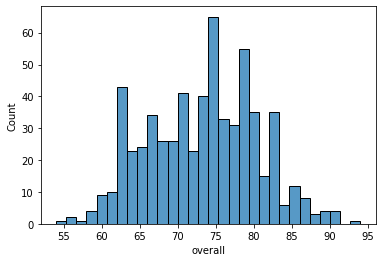

In [120]:
sns.histplot(data=spanish_players_df, x="overall", bins=30)

Además de mostrar la frecuencia en valores absoluto para cada cubeta, también podemos hacer que la altura de la cubeta muestre o bien la densidad (el área del histograma será 1) o la probabilidad (la suma de las alturas de las cubetas será 1). Esto lo conseguimos con el parámetro *stat*. Veamos dos ejemplos.

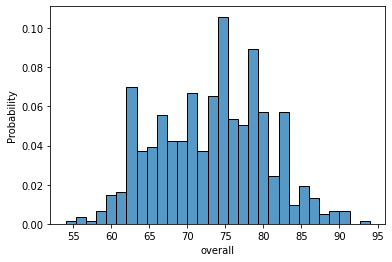

In [121]:
sns.histplot(data=spanish_players_df, x="overall", bins=30, stat="probability")

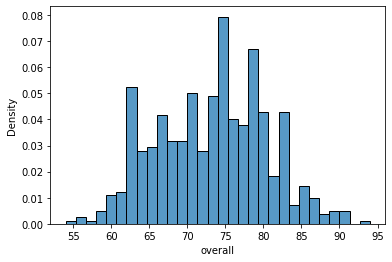

In [122]:
sns.histplot(data=spanish_players_df, x="overall", bins=30, stat="density")

A veces también es interesante superponer dos histogramas para la misma variable aleatoria en base al valor de una variable categórica. Esto nos permite analizar si existen diferencias en la muestra entre los histogramas construidos a partir de cada una de las categorías. Por ejemplo, en el siguiente gráfico analizamos si existen diferencias entre la forma general de los histogramas de la variable *overall* para jugadores diestros y zurdos. No se recomienda observar ambos histogramas comparando la frecuencia absoluta, ya que evidentemente existen diferencias a nivel de alturas en los histogramas. Los jugadores diestros son mucho más frecuentes.

**En base a los dos histogramas representados ¿dirías que son diametralmente diferentes en la muestra?** Parece que los diestros se extienden más, pero esto debe deberse a que hay pocos datos de zurdos.

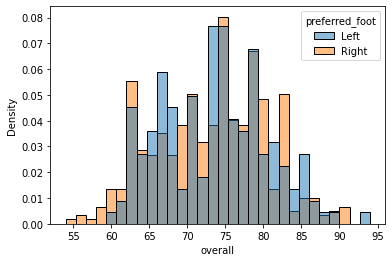

In [123]:
sns.histplot(data=spanish_players_df, x="overall", bins=30, hue="preferred_foot", stat="density", common_norm=False)

Ahora construye un histograma para la variable edad (*age*) con normalización en base a la densidad. 

**Atendiendo al histograma, ¿crees que los datos son aproximadamente normales? ¿presentan algún tipo de asimetría?** Parece que hay una asimetría por la derecha.

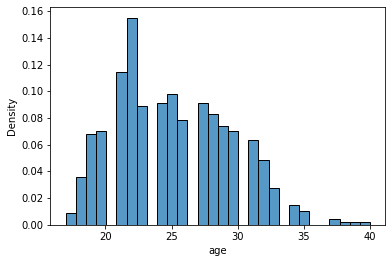

In [124]:
# Tu código aquí
sns.histplot(data=spanish_players_df, x="age", bins=30, stat="density")

Ahora representa el salario de los jugadores en euros (*wage_eur*) en un histograma normalizado en base a la densidad.

**¿Crees que el histograma se asemeja al de una distribución normal?** El histograma no parece una normal, presenta una asimetría por la derecha.

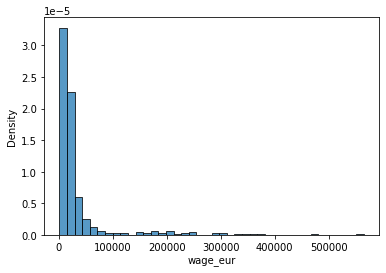

In [125]:
#Tu código aquí
sns.histplot(data=spanish_players_df, x="wage_eur", bins=40, stat="density")

Ahora construye un doble histograma para la variable aleatoria edad, pero diferenciando el histograma dependiendo del pie dominante.

**¿Observas diferencias notorias entre los histogramas de ambas muestras?** Parece que los datos de los diestros tienen una distribución más normal mientras que los zurdos presentan una mayor asimetría a la derecha.

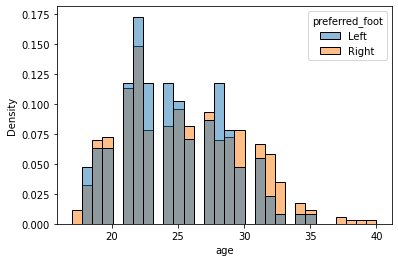

In [126]:
#Tu código aquí
sns.histplot(data=spanish_players_df, x="age", bins=30, hue="preferred_foot", stat="density", common_norm=False)

Otra forma alternativa de visualizar los datos de variables numéricas es mediante la construcción de gráficos de tipo caja-bigotes o *box-whisker*. Estos nos permiten analizar información como la mediana, el primer y tercer cuartil, posibles asimetrías, y datos potencialmente anómalos.

La construcción de estos diagramas con *Seaborn* se realiza mediante el método *boxplot*. A éste se le pasa como parámetro la variable aleatoria o columna que queremos representar en el diagrama caja bigotes.

En el siguiente ejemplo, mostramos como construir un *box-whisker* para la variable *overall* que determina la calificación general del jugador en el FIFA. Como vemos, proporcionamos por parámetro la columna en la que se encuentra la variable aleatoria en el *Dataframe*.

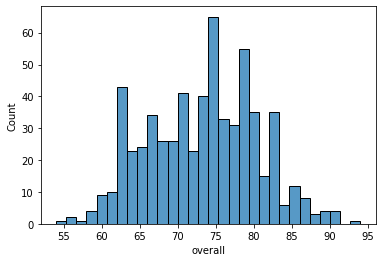

In [127]:
sns.histplot(data=spanish_players_df, x="overall", bins=30)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,main_position,continent,is_defender,is_forward
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,...,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2,FW,America,False,True


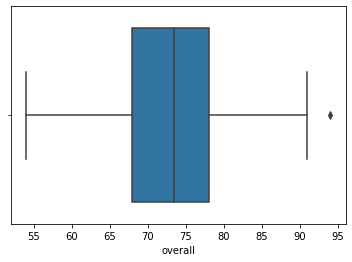

In [128]:
sns.boxplot( x=spanish_players_df.overall )
spanish_players_df[spanish_players_df['overall'] > 91]

**A la vista del gráfico anterior, ¿observas algún dato "anómalo"? ¿A qué jugador corresponde? ¿Lo considerarías realmente un dato anómalo? ¿Observas algún tipo de fuerte asimetría en los datos?** Se puede ver que Messi se sale de todo el conjunto de datos, pero esto no es un dato erroneo, simplemente es un jugador que tiene una puntuación muy superior a los demás. Aunque parece una distribución simétrica, tiene una pequeña asimetría por la derecha.


De forma similar a como hemos realizado con los histogramas, también podemos representar varios diagramas *box-whisker* para una misma variable aleatoria pero separados de acuerdo al valor de otra variable de tipo categórico. Por ejemplo, en el siguiente ejemplo observamos el diagrama caja-bigotes para la variable aleatoria *overall* pero atendiendo al pie dominante del jugador. Nótese como en este caso hemos decidido representar en el eje x el valor de la variable categórica y en el eje y la representación del propio *box-whisker*.

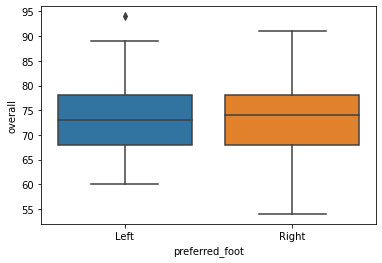

In [129]:
sns.boxplot( x=spanish_players_df.preferred_foot, y=spanish_players_df.overall )

Con lo que has aprendido, representa un diagrama caja-bigotes para la variable aleatoria *age*. **¿Se observa algún tipo de asimetría? ¿Existen datos "anómalos"?** Parece ser una distribución simétrica. Hay varios datos anomalos pero esto solo se debe a que son jugadores con unos 40 años, que no suele ser lo más común ya que usualmente los jugadores son de unos 25 años.

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,main_position,continent,is_defender,is_forward
288,106231,https://sofifa.com/player/106231/aritz-aduriz-...,Aduriz,Aritz Aduriz Zubeldia,38,1981-02-11,182,78,Spain,Athletic Club de Bilbao,82,82,8000000,29000,ST,Right,3,3,3,High/Medium,Normal,Yes,16800000.0,#Aerial Threat,ST,20.0,NaN,2012-07-01,2020.0,NaN,NaN,61.0,82.0,64.0,75.0,49.0,74.0,NaN,NaN,NaN,...,86,87,58,44,49,14,10,9,15,9,81+3,81+3,81+3,74+3,78+3,78+3,78+3,74+3,75+3,75+3,75+3,71+3,68+3,68+3,68+3,71+3,56+3,58+3,58+3,58+3,56+3,56+3,61+3,61+3,61+3,56+3,FW,Europe,False,True
487,45186,https://sofifa.com/player/45186/joaquin-sanche...,Joaquín,Joaquín Sánchez Rodríguez,37,1981-07-21,179,75,Spain,Real Betis,80,80,5000000,22000,"LM, ST, RM",Right,2,3,4,High/Medium,Normal,Yes,10500000.0,NaN,LM,17.0,NaN,2015-09-01,2020.0,NaN,NaN,66.0,78.0,83.0,82.0,44.0,56.0,NaN,NaN,NaN,...,75,79,41,47,39,9,14,6,10,11,76+2,76+2,76+2,79+2,79+2,79+2,79+2,79+2,80+2,80+2,80+2,78+2,76+2,76+2,76+2,78+2,61+2,61+2,61+2,61+2,61+2,58+2,52+2,52+2,52+2,58+2,MF,Europe,False,False
492,146748,https://sofifa.com/player/146748/diego-lopez-r...,Diego López,Diego López Rodríguez,37,1981-11-03,196,89,Spain,RCD Espanyol,80,80,1500000,17000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,3100000.0,NaN,GK,13.0,NaN,2017-07-01,2020.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.0,82.0,74.0,...,21,62,16,13,14,75,82,74,82,76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK,Europe,False,False
2965,110638,https://sofifa.com/player/110638/alberto-cifue...,Cifuentes,Alberto Cifuentes Martínez,40,1979-05-29,189,80,Spain,Cádiz CF,73,73,400000,4000,GK,Right,1,3,1,Medium/Medium,Normal,No,640000.0,NaN,GK,1.0,NaN,2015-07-04,2020.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.0,74.0,65.0,...,27,53,20,13,12,67,74,65,82,71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK,Europe,False,False
5240,113524,https://sofifa.com/player/113524/juan-francisc...,Nino,Juan Francisco Martínez Modesto,39,1980-06-10,169,68,Spain,Elche CF,70,70,525000,4000,"CF, ST",Right,2,4,3,Medium/Low,Normal,No,814000.0,NaN,ST,7.0,NaN,2016-08-19,2020.0,NaN,NaN,58.0,72.0,63.0,69.0,46.0,55.0,NaN,NaN,NaN,...,75,81,48,42,37,10,6,15,12,6,69+2,69+2,69+2,68+2,70+2,70+2,70+2,68+2,69+2,69+2,69+2,65+2,63+2,63+2,63+2,65+2,54+2,55+2,55+2,55+2,54+2,52+2,53+2,53+2,53+2,52+2,FW,Europe,False,True


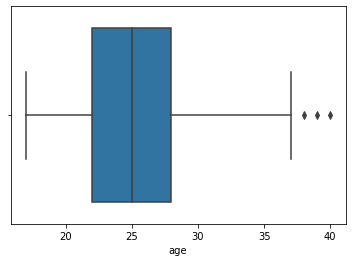

In [130]:
# Tu código aquí
sns.boxplot( x=spanish_players_df.age )
spanish_players_df[spanish_players_df['age'] > 35]

Ahora representa el diagrama *box-whisker* de la variable aleatoria *wage_eur* con el salario en euro de los jugadores. **¿Dirías que la variable aleatoria sigue una distribución normal? ¿Se asemeja este diagrama al de otra distribución de probabilidad que conozcas?** La distribución no sigue una distribución normal, se parece a una exponencial.

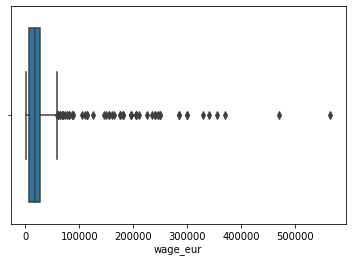

In [131]:
# Tu código aquí
sns.boxplot( x=spanish_players_df.wage_eur )

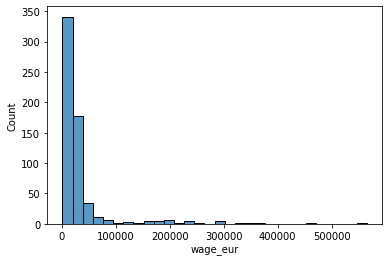

In [132]:
sns.histplot(data=spanish_players_df, x="wage_eur", bins=30)

# Inferencia sobre proporciones

Como hemos visto en la teoría de la asignatura, en base a la información contenida en una muestra podemos extraer información sobre la población mediante procesos de inferencia estadística. Uno de los casos más sencillos consiste en la inferencia sobre la proporción poblacional en una característica de tipo dicotómica (es decir, que se cumple o no). Por ejemplo, en nuestro conjunto de datos tenemos la característica *preferred_foot* que únicamente toma dos valores (*Left* o *Right*). 

Una herramienta muy útil a la hora de realizar inferencias sobre un parámetro poblacional es el intervalo de confianza. Un intervalo de confianza para un parámetro poblacional es un intervalo construido con un nivel de confianza $1-\alpha$. El $(1-\alpha)$% de las veces los intervalos construidos con este procedimiento contendrán el valor del verdadero parámetro poblacional.

El intervalo de confianza de una proporción puede construirse apoyándonos en el hecho que la media muestral de la proporción sigue una distribución normal. Más concretamente el intervalo de confianza para la proporción poblacional puede construirse como:

$ IC_{1-\alpha} = p \mp  Z_{\alpha/2} \sqrt{ \frac{p(1-p)}{n}}$

donde $p$ es la proporción en la muestra, $n$ es el tamaño de la muestra, y $Z_{\alpha/2}$ es el punto en una normal estándar que es menor o igual que $\alpha/2$\% de los posibles valores, o lo que es lo mismo, es mayor que $(1-\frac{\alpha}{2})$% de los posibles valores.

Veamos como podríamos calcular un intervalo de confianza (95%) para nuestra población (en este caso todos los jugadores profesionales en FIFA). Primero que nada, cogemos una muestra, por ejemplo de 100 individuos.

In [133]:
small_sample = player_df.sample(n=100)

A continuación, calculamos la proporción en la muestra. Es decir, contamos todos aquellos jugadores que son zurdos.

In [134]:
p = small_sample[ small_sample.preferred_foot == "Left" ].shape[0]/100
print(p)

0.19


Para calcular el intervalo de confianza necesitamos trabajar con la distribución normal estándarizada. Más concretamente necesitamos obtener el percentil $(1-\frac{\alpha}{2})$. En el siguiente fragmento de código mostramos algunas funciones útiles que podemos emplear cuando trabajamos con la distribución normal en Python (más concretamente en el paquete *Stats* de *Scipy*).

In [135]:
# Genera 10 datos aleatorios procedentes de una normal con media 20 y desviación típica 2
random_data = stats.norm.rvs(loc=20, scale=2, size= 10)
print(random_data)

# Obtiene el valor de la función de densidad para el punto 21.3 en una normal con media 20 y desviación típica 2
print( stats.norm.pdf( 21.3, loc=20, scale=2 ) )

# Obtiene la probabilidad de observar valores menores o iguales a cero en una distribución normal con media 0 y desviación típica 1
print( stats.norm.cdf( 0 ,loc=0, scale=1 ) )

#Obtiene el percentil 97.5 (mayor o igual que el 97.5% de las posibles observaciones) para una normal con media 0 y desviación típica 1
print( stats.norm.ppf( 0.975, loc = 0, scale = 1 ) )

#Obtiene los extremos del intervalo centrado en la media que contiene el 95% de las observaciones en una normal con media 0 y desviación típica 1
print( stats.norm.interval( 0.95, loc=0, scale=1 ) )

[22.86314999 17.40290863 21.89311849 20.31879823 21.1188116  21.75559434
 19.23804117 22.31297097 21.10587416 23.59433259]
0.1614861798339571
0.5
1.959963984540054
(-1.959963984540054, 1.959963984540054)


Con esta información, ya podemos construir nuestro intervalo de confianza para la proporción poblacional.

$ IC_{1-\alpha} = p \mp  Z_{\alpha/2} \sqrt{ \frac{p(1-p)}{n}}$

In [136]:
lower_bound = 0
upper_bound = 0
Zalpha = stats.norm.ppf( 0.975, loc=0, scale=1 )
deviation = Zalpha * math.sqrt( p*(1-p)/100 ) 
interval = ( p - deviation, p + deviation )
print(interval)

(0.1131104355256953, 0.2668895644743047)


En este particular caso que hemos planteado, podemos conocer el parámetro poblacional, ya que contamos con información de todos los jugadores profesionales en FIFA. Veamos cuál es esa proporción.

In [137]:
true_p = player_df[ player_df.preferred_foot == "Left" ].shape[0]/player_df.shape[0]
print(true_p)

0.23624028887186782


**¿Contenía el intervalo de confianza el valor de la proporción poblacional? Recuerda que en nuestro caso, un 95% de las veces que construyamos este intervalo el valor poblacional se encontrará dentro (aunque no sabemos exactamente su valor)** Si.

Ahora obten una muestra de 1000 jugadores y calcula de nuevo dicho intervalo de confianza **¿Qué ha sucedido con ese intervalo comparado con el anterior? ¿Qué conclusiones extraes de la construcción de intervalos de confianza con tamaños de muestra mayores?** En el intervalo de 95%, contra más muestras más pequeño. Me parece que contra más muestras se tiene, más preciso debería ser el intervalo, por lo que únicamente se centra más hacia donde debe apuntar la población y se reduce el tamaño.

In [138]:
# Tu código aquí
small_sample = player_df.sample(n=100)
p = small_sample[ small_sample.preferred_foot == "Left" ].shape[0]/100
Zalpha = stats.norm.ppf( 0.975, loc=0, scale=1 )
deviation = Zalpha * math.sqrt( p*(1-p)/100 ) 
interval = ( p - deviation, p + deviation )
print("Intervalo de 100 muestras -> ",interval)
print("Tamaño -> ",((p + deviation)-(p - deviation)))


sample = player_df.sample(n=1000)
p1 = sample[ sample.preferred_foot == "Left" ].shape[0]/1000
Zalpha = stats.norm.ppf( 0.975, loc=0, scale=1 )
deviation_1 = Zalpha * math.sqrt( p1*(1-p1)/1000 ) 
interval = ( p1 - deviation_1, p1 + deviation_1 )
print("Intervalo de 1000 muestras -> ",interval)
print("Tamaño -> ",((p1 + deviation_1)-(p1 - deviation_1)))

Intervalo de 100 muestras ->  (0.13016905247003796, 0.289830947529962)
Tamaño ->  0.15966189505992406
Intervalo de 1000 muestras ->  (0.22316208784424263, 0.27683791215575737)
Tamaño ->  0.05367582431151474


Ahora, en vez de construir un intervalo de confianza para un nivel de confianza del 95%, construye el intervalo de confianza del 99% para la proporción poblacional. 
**Comparado con el intervalo construido para el mismo tamaño de muestra pero con un nivel de confianza del 95%, ¿qué puedes decir de la amplitud del nuevo intervalo de confianza? ¿qué conclusiones extraes de esto?** La amplitud del intervalo aumenta, y al tener que estar estimando un mayor número de muestras, aumenta de tamaño.

In [139]:
#Tu código aquí
small_sample = player_df.sample(n=100)
p = small_sample[ small_sample.preferred_foot == "Left" ].shape[0]/100
Zalpha = stats.norm.ppf( 0.99, loc=0, scale=1 )
deviation = Zalpha * math.sqrt( p*(1-p)/100 ) 
interval = ( p - deviation, p + deviation )
print("Intervalo de 99% (100 muestras) -> ",interval)
print("Tamaño -> ",((p + deviation)-(p - deviation)))


sample = player_df.sample(n=1000)
p1 = sample[ sample.preferred_foot == "Left" ].shape[0]/1000
Zalpha = stats.norm.ppf( 0.99, loc=0, scale=1 )
deviation_1 = Zalpha * math.sqrt( p1*(1-p1)/1000 ) 
interval = ( p1 - deviation_1, p1 + deviation_1 )
print("Intervalo de 99% (1000 muestras) -> ",interval)
print("Tamaño -> ",((p1 + deviation_1)-(p1 - deviation_1)))

Intervalo de 99% (100 muestras) ->  (0.12363189924207675, 0.31636810075792327)
Tamaño ->  0.19273620151584653
Intervalo de 99% (1000 muestras) ->  (0.19808853499342804, 0.259911465006572)
Tamaño ->  0.06182293001314393


En el siguiente fragmento de código mostramos precisamente la definición de intervalo de confianza. Extraemos cien muestras aleatorias, construimos el intervalo de confianza para el parámetro poblacional, y contamos el número de veces que el intervalo de confianza contiene el verdadero valor del parámetro poblacional. Al final imprimimos el porcentaje de éxitos. Podrás observar que el valor está cercano a 95%. En infinitas repeticiones este valor sería del 95%.

0.94


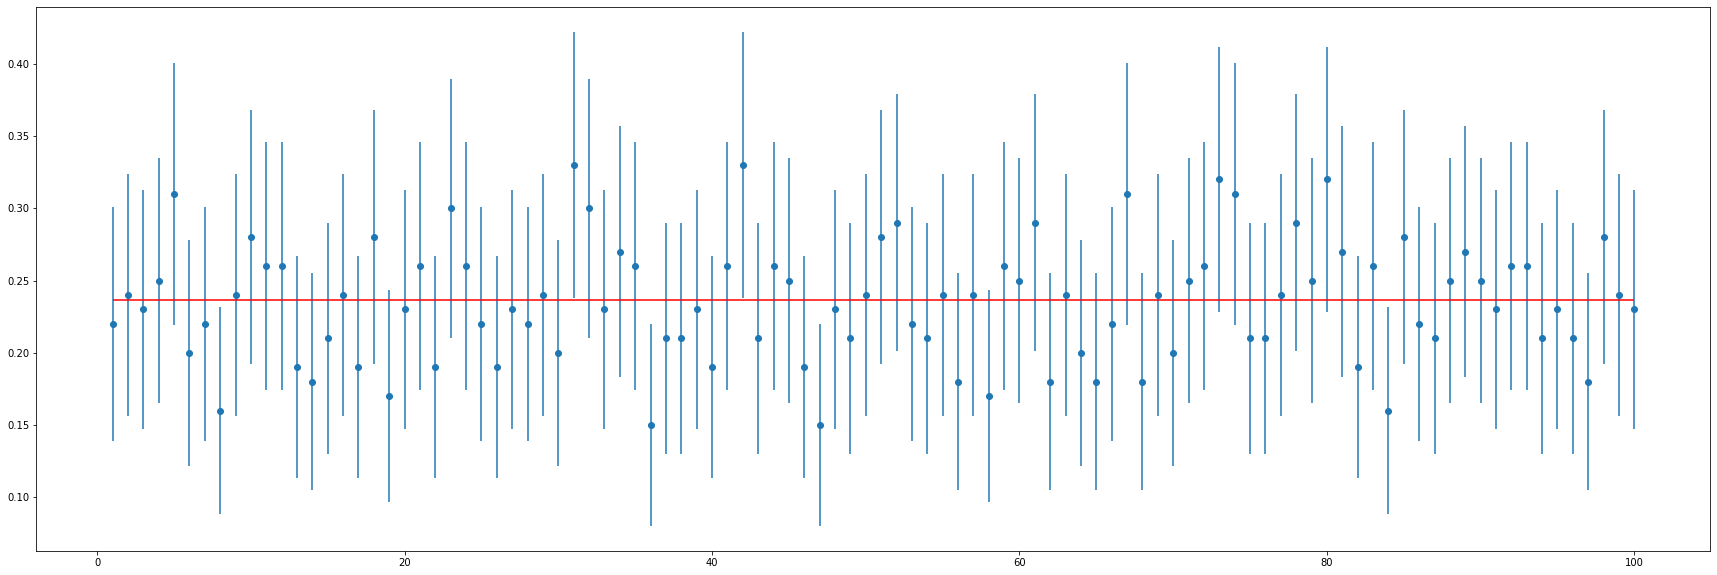

In [140]:
number_success = 0
intervals = []
n_rep = 100
for i in range(n_rep):
  n = 100

  small_sample = player_df.sample(n=n)

  p = small_sample[ small_sample.preferred_foot == "Left" ].shape[0]/n

  lower_bound = 0
  upper_bound = 0
  Zalpha = stats.norm.ppf( 0.975, loc=0, scale=1 )
  deviation = Zalpha * math.sqrt( p*(1-p)/n ) 
  interval = ( p - deviation, p + deviation )

  intervals.append(interval)

  if true_p >= interval[0] and true_p <= interval[1]:
    number_success = number_success + 1


print(number_success/n_rep)

plt.figure(figsize=(30,10))
plt.errorbar( x=list(range(1, n_rep+1)), y=[ (x[1]+x[0])/2 for x in intervals ], yerr=[ (x[1]-x[0])/2 for x in intervals ], fmt='o' )
plt.hlines( xmin=1, xmax=100, y=true_p, colors="red" )


#Pruebas de normalidad

Una de las asunciones en muchas técnicas de inferencia estadística es el trabajo con poblaciones normales. Por tanto, un primer paso para poder aplicar algunas de estas técnicas de inferencia estadística será determinar si la variable aleatoria bajo estudio sigue una distribución normal. Existen varias alternativas a la hora de comprobar la normalidad de una variable aleatoria a partir de una muestra:
* Pruebas de asimetría y curtosis
*  Pruebas de normalidad de Shapiro-Wilk o Kolgomorov-Smirnov
*  Papel probabilístico normal
*  Histograma

Los dos últimos no son métodos con unas reglas de aplicación estricta, y la asunción final de normalidad queda a análisis y juicio del propio analista. Por otro lado, las pruebas de asimetría, curtosis, y las pruebas de normalidad son contrastes de hipótesis formales con reglas de aplicación claras.

## Pruebas de asimetría y curtosis

Veamos como aplicar la prueba de asimetría y curtosis. La prueba de asimetría establece las siguientes hipótesis:

$H_0: $ El coeficiente de asimetría (CA) de la población sigue una asimetria propia de una población normal (CA = 0)

$H_1: $ El coeficiente de asimetría (CA) de la población sigue una asimetría diferente de una población normal (CA != 0)

Por tanto, cuando el p-valor del test sea menor al nivel $\alpha$ seleccionado para el problema tendremos evidencias de que $H_1$ es cierta. Rechazaremos $H_0$ y aceptaremos $H_1$, por tanto descartando normalidad.

La prueba de curtosis establece las siguiente hipótesis:

$H_0: $ El coeficiente de curtosis (CC) de la población sigue una curtosis propia de una población normal (CC=0)

$H_1: $ El coeficiente de curtosis (CC) de la población tiene una curtosis diferente a la de una población normal (CC!=0)

Veamos un ejemplo con Python, apoyándonos en *skewtest* y *kurtosistest*, disponible en *Scipy*. En el siguiente ejemplo tomamos una muestra de 100 jugadores de nuestra población de jugadores profesionales y determinamos con una confianza del 95% si en la muestra tenemos evidencias suficientes como para afirmar que los datos no se comportan como una normal.


In [141]:
sample = player_df.sample(n=100)
print( stats.skewtest( sample.overall ) )
print( stats.kurtosistest( sample.overall ) )

SkewtestResult(statistic=-0.32788915976894895, pvalue=0.7429954703015995)
KurtosistestResult(statistic=-1.1174211666179692, pvalue=0.26381428908064397)


En el ejemplo anterior, cada uno de los contrastes devuelve el valor del estadístico asociado al contraste, así como el pvalor del contraste. En ambos casos, seguramente has obtenido p-valores mayores a 0.05. Por tanto, no podemos afirmar que con dicha muestra tengamos evidencias suficientes como para pensar que los datos no provienen de una normal. En caso de que alguno de los test hubiera obtenido un p-valor menor o igual a nuestro valor de significancia estadística (i.e., $\alpha$) tendríamos evidencias para pensar que H1 es cierta y pensar que los datos no son normales.

Ahora realiza un test de curtosis y asimetría sobre una muestra de la variable aleatoria *wage_eur* **¿Qué nos está indicando el test? ¿Concuerda esto con la información que habíamos observado en el box-whisker e histograma?** Cuando hicimos el box-whiskers y el histograma, los salarios parecia que seguían una distribución más parecida a una exponencial. Esto se corrobora ya que obtenemos valores mucho más pequeños que 0.05.

In [142]:
# Tu código aquí
sample = player_df.sample(n=100)
print(stats.skewtest(sample.wage_eur))
print(stats.kurtosistest(sample.wage_eur))

SkewtestResult(statistic=8.96221996103233, pvalue=3.1820631176050585e-19)
KurtosistestResult(statistic=6.594622725345209, pvalue=4.2633861841380426e-11)


## Prueba de normalidad de Shapiro-Wilk y Kolmogorov-Smirnov

Aunque podemos usar las pruebas de curtosis y asimetría para recoger evidencias sobre la no-normalidad de una variable aleatoria, existen también pruebas especializadas en determinar si una determinada aleatoria proviene de una población normal. 

La prueba de Kogolmorov-Smirnov se emplea para normalmente determinar si la función de distribución acumulada de una determinada muestra difiere significativamente de la función de distribución acumulada de una distribución teórica. Cuando la función de distribución acumulada de la muestra se compara con la de una población normal, esta prueba puede emplearse para determinar si hay evidencias de que la muestra no se comporte como una distribución normal. De forma simplificada, en el caso de tomar como referencia una distribución normal, este test establece las siguientes hipótesis:

$H_0: $ La función de distribución acumulada se comporta como la función de distribución acumulada de una distribución normal.

$H_1: $ La función de distribución acumulada difiere de la función de distribución acumulada de una distribución normal.

Cuando el p-valor es menor al nivel de significancia ($\alpha$) establecido para el test, podemos afirmar que tenemos suficientes evidencias para aceptar la hipótesis alternativa y asumir que la variable aleatoria no se comporta como un modelo normal. Veamos un ejemplo de cómo podemos aplicar esta prueba, también implementada en *Scipy*.



In [143]:
stats.kstest( (sample.overall-sample.overall.mean())/sample.overall.std(), 'norm'  )

KstestResult(statistic=0.07644733606293563, pvalue=0.5911972801571284)

Nótese que la variable debe ser previamente normalizada para una correcta comparación. En este caso, de nuevo el test devuelve el valor del estadístico asociado al test y el p-valor. Muy posiblemente has obtenido un p-valor superior a un nivel de significancia de 0.05. Por tanto, no tenemos evidencias para afirmar que los datos no se comporten como una normal.

Ahora realiza este mismo test sobre la variable aleatoria *age* **¿Hay suficientes evidencias como para afirmar que la variable edad no se comporte como una normal?** Hemos obtenido más de 0.05 en el valor de pvalue, no hay suficientes evidencias para afirmas que no se comporte como una normal.

In [144]:
#Tu código aquí
stats.kstest( (sample.age-sample.age.mean())/sample.age.std(), 'norm'  )

KstestResult(statistic=0.10673087467159492, pvalue=0.1906756430016002)

Una alternativa más adecuada como prueba formal de normalidad es la prueba de Shapiro-Wilk. Esta es una prueba especializada en detectar desviaciones significativas del modelo teórico normal (a diferencia de Kolgomorov, que es genérico y se puede usar para otras distribuciones) y tiene más poder que la prueba de Kolgomorov-Smirnov a la hora de detectar desviaciones de la normalidad. De forma resumida y simplificada, decimos que una prueba tiene más poder que otra para cuando, para un mismo tamaño de muestra, es capaz de detectar diferencias más pequeñas con respecto a la hipótesis nula (i.e., rechazar la hipótesis nula cuando es falsa). En este caso, para un mismo tamaño de muestra, la prueba de Shapiro-Wilk es capaz de detectar desviaciones más pequeñas con respecto a la normalidad y rechazar la hipótesis nula. Por ello, es preferible emplear esta prueba en la práctica. A nivel formal, el test de Shapiro-Wilk establece las siguientes hipótesis:

$H_0:$ La variable aleatoria estudiada procede de una población normal

$H_1:$ La variable aleatoria estudiada no procede de una población normal

Su aplicación en Python es más sencilla que el test de Kolgomorov Smirnov, ya que no requerimos de previa estandarización. Esto lo podemos observar en el siguiente ejemplo.

In [145]:
stats.shapiro( sample.overall )

(0.9875490069389343, 0.47557124495506287)

De nuevo, la prueba devuelve el valor del estadístico asociado, así como el p-valor de la prueba. Muy posiblemente, has obtenido un p-valor superior a un nivel de significancia de 0.05.

Ahora aplica el test de shapiro a la variable aleatoria *value_eur*.**¿Qué conclusiones se extraen de la prueba? Corrobora los resultados con un histograma** Obtenemos un valor menor a 0.05, por lo afirmamos H1 y decimos que no procede de una distribución normal, cosa que se corrobora en el histograma donde se puede ver que tiene más forma de una exponencial.

In [146]:
#Tu código aquí
stats.shapiro( sample.value_eur )

(0.5326443910598755, 2.669710206891626e-16)

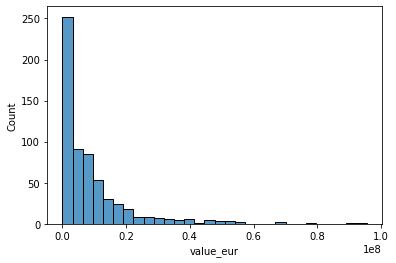

In [147]:
sns.histplot(data=spanish_players_df, x="value_eur", bins=30)

## Papel probabilístico normal

Los gráficos de probabilidad son gráficos que comparan la distribución acumulada de probilidad de una muestra de datos con la distribución acumulada de probabilidad de una distribución teórica determinada. El papel probabilístico normal es un caso específico de este tipo de gráficos cuando la distribución de referencia es una normal. Existen diversas formas de construir este tipo de gráficos de probabilidad dependiendo de las escalas empleadas. En esta práctica representaremos en el eje horizontal la probabilidad teórica acumulada, mientras que en el eje y se representan las observaciones en la muestra. Cuando los datos en la muestra se comportan de forma acorde al modelo teórico con el que se compara, los puntos representados se ajustan fielmente a una recta.

En Python existen muchas formas de representar estos gráficos, pero una forma sencilla es apoyándose en el paquete *StatsModels* y haciendo uso de la clase *ProbPlot*. En el siguiente ejemplo representamos el gráfico de probabilidad normal de la variable *overall* con respecto a una normal.

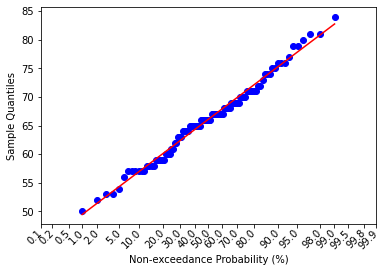

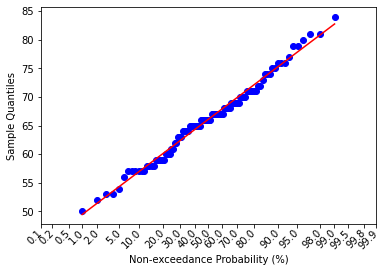

In [148]:
plot = sm.ProbPlot( sample.overall, dist="norm" )
plot.probplot(line="r")

Ahora intenta obtener el gráfico de probabilidad normal para la variable *age*. **¿Consideras que los datos de la muestra se desvían significativamente del comportamiento teórico de la normal?** Parece que los datos llevan una distribución normal si nos guiamos por estos gráficos.

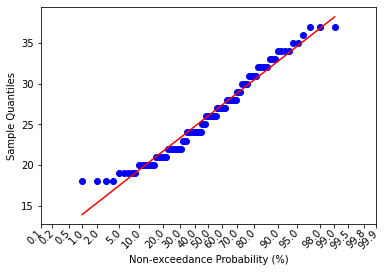

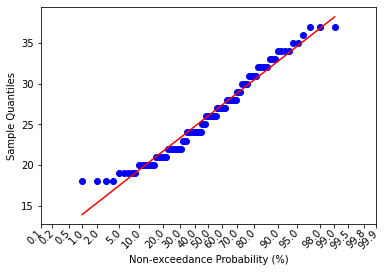

In [149]:
#Tu código aquí
plot = sm.ProbPlot( sample.age, dist="norm" )
plot.probplot(line="r")

Finalmente intenta obtener el gráfico de probabilidad normal para la variable *wage_eur*. **¿Consideras que los datos de la muestra se desvían significativamente del comportamiento teórico de la normal?** En este caso si que se nota que con una probabilidad de alrededor de 95% y más, podemos ver que se desvía significativamente del comportamiento de la normal.

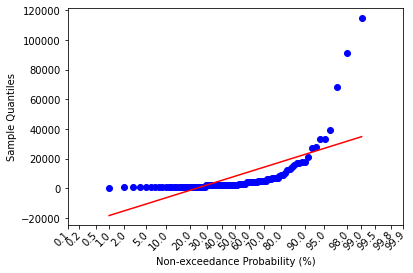

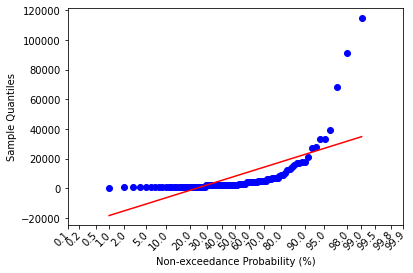

In [150]:
#Tu código aquí
plot = sm.ProbPlot( sample.wage_eur, dist="norm" )
plot.probplot(line="r")

## Las pruebas de normalidad y las muestras grandes

Hasta ahora hemos aplicado pruebas de diagnóstico de normalidad para detectar desviaciones de normalidad en muestras de tamaño relativamente pequeño. No obstante, en la actualidad es bastante frecuente tener acceso a muestras grandes. Esto es especialmente así en aplicaciones o dominios digitalizados.

Veamos qué ocurre con las pruebas en las que no pudimos descartar normalidad cuando la muestra proporcionada es grande. En vez obtener una muestra de 100 individuos, obtengamos diversas muestras de tamaños mayores (aunque ni siquiera es grande en los estándares de muchos conjuntos de datos).


In [151]:
new_sample1 = player_df.sample(n=1000)
new_sample2 = player_df.sample(n=2000)
new_sample3 = player_df.sample(n=4000)

Comprobemos ahora la normalidad para la variable *overall* a partir de la nueva muestra recogida.

In [152]:
print( stats.shapiro( new_sample1.overall ) ) 
print( stats.shapiro( new_sample2.overall ) ) 
print( stats.shapiro( new_sample3.overall ) ) 

print(stats.kstest( (new_sample1.overall-new_sample1.overall.mean())/new_sample1.overall.std(), 'norm'  ))
print(stats.kstest( (new_sample2.overall-new_sample2.overall.mean())/new_sample2.overall.std(), 'norm'  ))
print(stats.kstest( (new_sample3.overall-new_sample3.overall.mean())/new_sample3.overall.std(), 'norm'  ))

(0.9950453639030457, 0.002389411209151149)
(0.9952665567398071, 5.704149771190714e-06)
(0.9967378973960876, 1.2494356838033127e-07)
KstestResult(statistic=0.04437679596718741, pvalue=0.03778278940102097)
KstestResult(statistic=0.04687097922938252, pvalue=0.0002948651263744163)
KstestResult(statistic=0.038081442343535055, pvalue=1.830341639752009e-05)


¿Qué ha ocurrido con el restultado de estos tests? ¿qué conclusiones arrojan? Es bastante posible que algo totalmente opuesto a lo que habíamos concluido en las pruebas anteriores.

¿Significa que una de las dos pruebas de normalidad nos ha mentido? **NO**. De nuevo, debemos tener en cuenta que los contrastes de hipótesis trabajan en base los datos con los que cuentan, e intentan buscar evidencias para rechazar la hipótesis nula con la muestra proporcionada.

Cuando las muestras son pequeñas, los contrastes de hipótesis únicamente son capaces de detectar grandes desviaciones en el comportamiento con respecto a la hipótesis nula. A medida que aumentamos el tamaño de muestra, estas pruebas tienen más información y por tanto más posibles evidencias para discernir si existen evidencias de diferencias entre lo esperado y lo observado. Esto hace posible que se puedan detectar desviaciones más pequeñas con respecto a la hipótesis nula. Cuando el tamaño de la muestra es lo suficientemente grande, la prueba tiene la precisión suficiente incluso para detectar diferencias muy pequeñas con respecto al comportamiento esperado.

Bien, entonces con un tamaño de muestra lo suficientemente grande hemos sido capaces de detectar diferencias entre la distribución normal y el comportamiento a nivel poblacional de la variable *overall*. La distribución normal, al igual que otras distribuciones de probabilidad, son modelos teóricos. Los modelos, como bien sabemos, describen determinados aspectos o partes de la realidad. Por tanto, como modelo teórico, no se garantiza que una variable aleatoria real tenga que seguir fielmente al 100% el comportamiento de una de las distribuciones de probabilidad teóricas. De hecho, vamos a estudiar el comportamiento de la variable *overall* en toda la población, ya que tenemos acceso a toda la población. 

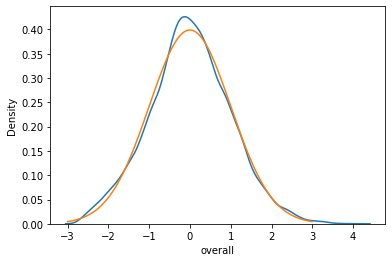

In [153]:
axes = sns.kdeplot( (player_df.overall - player_df.overall.mean() )/(player_df.overall.std()), common_norm=False  )
sns.lineplot( y=[ stats.norm.pdf(x) for x in np.arange(-3, 3, 0.01) ], x= [x for x in np.arange(-3, 3, 0.01)] )

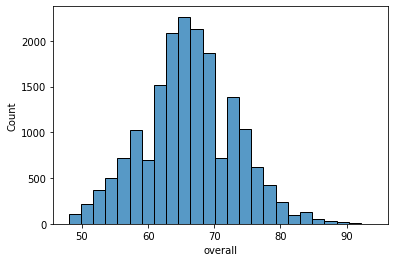

In [154]:
sns.histplot(player_df.overall, bins=25)

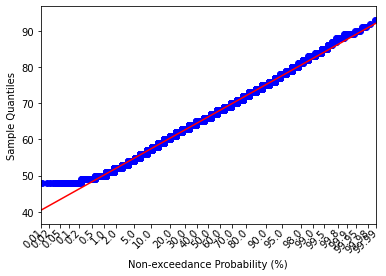

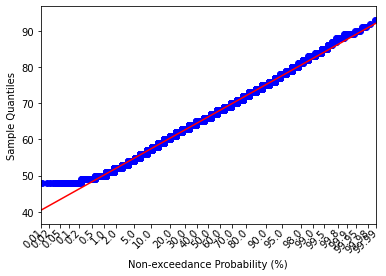

In [155]:
plot = sm.ProbPlot( player_df.overall, dist="norm" )
plot.probplot(line="r")

El primer gráfico muestra la función de densidad de una distribución normal (naranja) y la función de densidad estimada a partir de los datos de toda la población. Tras ello mostramos el histograma de la población entera, y el gráfica de probabilidad normal. Está claro que la variable aleatoria no sigue exactamente una distribución normal, y esto es lo que nos habían dicho los tests una vez hemos tenido una muestra lo suficientemente grande. Pero quizás, la pregunta que nos tengamos que hacer son las siguientes:
*  ¿Son las diferencias lo suficientemente importantes como para escoger otro modelo o familia de técnicas?
*  ¿Existe otra familia de distribuciones de probabilidad más apropiada para describir el comportamiento aproximado de esta variable aleatoria? ¿Se cumplen las asunciones de dichas distribuciones de probabilidad en nuestra variable aleatoria?
*  Muchas herramientas de inferencia estadística paramétrica son relativamente robustas a desviaciones con respecto a la normalidad. Por tanto, se pueden emplear incluso en el caso de datos no normales.

Recordar que al modelar una variable aleatoria como una determinada distribución de probabilidad estamos intentando modelar la realidad. Muchos de los modelos que empleamos en ingeniería y ciencia son aproximaciones al mundo real, y siempre van a cometer un cierto error asociado. Lo que buscamos, por lo general, es el modelo que es capaz de explicar mejor el mundo real. Con las variables aleatorias pasa algo parecido. 

Muchas variables aleatorias muestras un comportamiento *aproximadamente normal*, y debido a que no son muy diferentes en comportamiento a una distribución normal, se emplean las técnicas de inferencia paramétrica empleadas para variables normales.

#Inferencia sobre la media de poblaciones normales 

Como bien habéis visto en clase de teoría, también es posible realizar inferencias sobre la media de una población normal. Dependiendo de si conocemos o no la varianza poblacional (algo raro en la práctica) nos basamos para su construcción bien en la distribución normal o en la distribución t de Student (una distribución en el muestreo).

En esta práctica vamos a centrarnos en la construcción de intervalos de confianza para la media poblacional cuando NO conocemos la varianza poblacional. Este es el caso más típico y habitual en la práctica, ya que únicamente tenemos acceso a trabajar con un conjunto de datos que es una muestra de la población, y no solemos saber nada sobre esta última.

Dada una muestra procedente de una población normal con tamaño $n$ y varianza desconocida, el intervalo de confianza ($1-\alpha$)% asociado a la media poblacional es el siguiente:

$IC_{1-\alpha}= \bar{x} \mp t_{n-1;\alpha/2} \frac{s}{\sqrt{n}}$

donde $\bar{x}$ es la media muestral, $s$ es la deviación típica en la muestra, $n$ es el tamaño de la muestra, y $t_{n-1;\alpha/2}$ es el punto en una distribución t de Student con $n-1$ grados de libertad que es menor que $\frac{\alpha}{2}$% de las observaciones.

Podemos trabajar con una t de Student en Python de forma similar a cómo lo hacíamos con la distribución normal.





In [156]:
# Genera 10 datos aleatorios procedentes de una t de Student con 4 grados de libertad
random_data = stats.t.rvs( 4, size= 10)
print(random_data)

# Obtiene el valor de la función de densidad para el punto 1 en una t de Student con 4 grados de libertad
print( stats.t.pdf( 1, 4 ) )

# Obtiene la probabilidad de observar valores menores o iguales a cero en una distribución t de student con 4 grados de libertad 
print( stats.t.cdf( 0, 4 ) )

#Obtiene el percentil 97.5 (mayor o igual que el 97.5% de las posibles observaciones) para una t de student con 4 grados de libertad 
print( stats.t.ppf( 0.975, 4 ) )

#Obtiene los extremos del intervalo centrado en 0 que contiene el 95% de las observaciones en una t de student con 4 grados de libertad 
print( stats.t.interval( 0.95, 4 ) )

[ 0.70949392 -0.35787857 -1.13371937  0.05354351 -1.29966572 -0.15845345
  1.56817769 -0.23242914 -0.7978924  -2.75614253]
0.21466252583997983
0.5
2.7764451051977987
(-2.7764451051977987, 2.7764451051977987)


Usando nuestra muestra de jugadores, ahora construiremos un intervalo de confianza (95%) para la media poblacional de la variable *overall*.

In [157]:
lower_bound = 0
upper_bound = 0
x = sample.overall.mean()
n = sample.shape[0]
t = stats.t.ppf(0.975, n-1 )
s = sample.overall.std()
lower_bound = x - t * s/math.sqrt(n)
upper_bound = x + t * s/math.sqrt(n)
print(lower_bound, upper_bound)
print("media muestral -> ",x)

64.7333009615066 67.4866990384934
media muestral ->  66.11


**¿Cómo interpretarías el anterior intervalo?** Segun el intervalo, pienso que se trata de una distribución con poca dispersión y bastante apuntada en torno a 67.09, por lo que, si se trata de una normal, tendría una asimetría por la izquierda bastante considerable.

En base a lo que has aprendido, construye el intervalo de confianza para la media de la variable *weight_kg*. Comprueba normalidad antes. 

 alpha -> 0.05 

SkewtestResult(statistic=1.0533823022818616, pvalue=0.29216581200162495) 
 -> H0:  El coeficiente de asimetría (CA) de la población sigue una asimetria propia de una población normal (CA = 0)

KurtosistestResult(statistic=0.21140212911887776, pvalue=0.8325734954903841) 
 -> H0:  El coeficiente de curtosis (CC) de la población sigue una curtosis propia de una población normal (CC=0)

KstestResult(statistic=0.092058927453884, pvalue=0.3455190967751117) 
 -> H0:  La función de distribución acumulada se comporta como la función de distribución acumulada de una distribución normal.

(0.9825605154037476, 0.2093370109796524) 
 -> H0:  La variable aleatoria estudiada procede de una población normal

Despues de hacer varios tipos de pruebas de normalidad y todas diciendo que la distribución sigue una normal, concluimos que sigue una normal.

(lower_bound:  75.0321044494591 , upper_bound:  77.88789555054089 )
media muestral ->  76.46


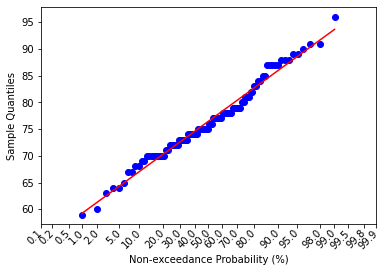

In [158]:
# Tu código aquí
sample = player_df.sample(n=100)
print(" alpha -> 0.05 \n")
print( stats.skewtest( sample.weight_kg ) , "\n -> H0:  El coeficiente de asimetría (CA) de la población sigue una asimetria propia de una población normal (CA = 0)\n" )
print( stats.kurtosistest( sample.weight_kg ) , "\n -> H0:  El coeficiente de curtosis (CC) de la población sigue una curtosis propia de una población normal (CC=0)\n")
print( stats.kstest( (sample.weight_kg-sample.weight_kg.mean())/sample.weight_kg.std(), 'norm'  ) , "\n -> H0:  La función de distribución acumulada se comporta como la función de distribución acumulada de una distribución normal.\n")
print( stats.shapiro( sample.weight_kg ) , "\n -> H0:  La variable aleatoria estudiada procede de una población normal\n")
plot = sm.ProbPlot( sample.weight_kg, dist="norm" )
plot.probplot(line="r")

print("Despues de hacer varios tipos de pruebas de normalidad y todas diciendo que la distribución sigue una normal, concluimos que sigue una normal.\n")

lower_bound = 0
upper_bound = 0
x = sample.weight_kg.mean()
n = sample.shape[0]
t = stats.t.ppf(0.975, n-1 )
s = sample.weight_kg.std()
lower_bound = x - t * s/math.sqrt(n)
upper_bound = x + t * s/math.sqrt(n)
print("(lower_bound: ",lower_bound,", upper_bound: ", upper_bound,")")
print("media muestral -> ",x)

# Inferencia sobre la varianza en poblaciones normales

Finalmente veremos cómo podemos calcular el intervalo de confianza para la varianza poblacional cuando trabajamos con distribuciones normales. La varianza muestral y la varianza poblacional en una población normal están relacionados por un estadístico basado en la Chi-cuadrado. Más concretamente, a partir de la varianza muestral, podemos establecer un intervalo de confianza para la varianza poblacional:

$IC_{1-\alpha}=[ (n-1) \frac{s^2}{\chi^2_{n-1;\alpha}}, (n-1) \frac{s^2}{\chi^2_{n-1;1-\alpha}}  ]$

donde $n$ es el tamaño de la muestra, $s^2$ es la varianza muestral, y $\chi^2_{n-1; \alpha}$ es el punto en una distribución Chi-cuadrado con $n-1$ grados de libertad que es menor que $\alpha$% de las observaciones. La interpretación para este tipo de intervalos es similar a la de otros intervalos de confianza.

Para poder calcular este intervalo necesitamos trabajar con la distribución Chi-cuadrado. Veamos como podemos interactuar con esta distribución desde Python.

In [159]:
# Genera 10 datos aleatorios procedentes de una Chi cuadrado con 4 grados de libertad
random_data = stats.chi2.rvs( 4, size= 10)
print(random_data)

# Obtiene el valor de la función de densidad para el punto 2 en una chi cuadrado con 4 grados de libertad
print( stats.chi2.pdf( 2, 4 ) )

# Obtiene la probabilidad de observar valores menores o iguales a 1 en una distribución chi cuadrado con 4 grados de libertad 
print( stats.chi2.cdf( 1, 4 ) )

#Obtiene el percentil 97.5 (mayor o igual que el 97.5% de las posibles observaciones) para una chi cuadrado 4 grados de libertad 
print( stats.chi2.ppf( 0.975, 4 ) )

#Obtiene los extremos del intervalo que contiene el 95% de las observaciones en una chi cuadrado con 4 grados de libertad 
print( stats.chi2.interval( 0.95, 4 ) )

[5.93625555 1.39675665 2.24278919 4.25095123 1.49904982 0.20840088
 0.85527706 1.86639762 2.84859941 5.13140359]
0.18393972058572114
0.09020401043104986
11.143286781877796
(0.48441855708793014, 11.143286781877796)


En base a esto, veamos cómo podemos calcular un intervalo de confianza (95%) para la varianza poblacional de la variable aleatoria *overall*.

In [160]:
lower_bound = 0
upper_bound = 0
n = sample.shape[0]
s2 = sample.overall.std()
chi1 = stats.chi2.ppf(1-0.05/2, n - 1 )
chi2 = stats.chi2.ppf(0.05/2, n - 1 )
lower_bound = (n-1)*s2/chi1
upper_bound = (n-1)*s2/chi2
print(lower_bound, upper_bound)
print("varianza muestral -> ",s2)


6.273184683203743 10.981502045042438
varianza muestral ->  8.137523759061656


**Interpreta el significado de este intervalo anterior** La varianza de la población se encuentra dentro del intervalo definido con un 95% de fiabilidad.

Ahora calcula el intervalo de confianza (99%) para la varianza poblacional de la variable aleatoria *weight_kg* e intepreta su resultado.

In [161]:
# Tu código aquí
lower_bound = 0
upper_bound = 0
n = sample.shape[0]
s2 = sample.weight_kg.std()
chi1 = stats.chi2.ppf(1-0.01/2, n - 1 )
chi2 = stats.chi2.ppf(0.01/2, n - 1 )
lower_bound = (n-1)*s2/chi1
upper_bound = (n-1)*s2/chi2
print(lower_bound, upper_bound)
print("varianza muestral -> ",s2)


5.125886376209277 10.711612266019218
varianza muestral ->  7.196267270346665


**Interpretación:**
La varianza de la población estará dentro del intervalo definido con un 99% de confianza.

#Tarea: Explorando datos

Ahora escoge tres variables aleatorias de la muestra *sample*, dos de las cuales deben ser normales. Estudia la normalidad de estas tres variables apoyándote en métodos gráficos y en pruebas. A continuación, para las variables normales construye el intervalo de confianza para la media y la varianza poblacional e interpreta su significado.

 alpha -> 0.05 

       Potential:

SkewtestResult(statistic=1.2231681818280378, pvalue=0.22126618060274506) 
    -> H0:  El coeficiente de asimetría (CA) de la población sigue una asimetria propia de una población normal (CA = 0)
KurtosistestResult(statistic=-0.6237281024904199, pvalue=0.5328061639934352) 
    -> H0:  El coeficiente de curtosis (CC) de la población sigue una curtosis propia de una población normal (CC=0)
KstestResult(statistic=0.07635854598323666, pvalue=0.5928395307723833) 
    -> H0:  La función de distribución acumulada se comporta como la función de distribución acumulada de una distribución normal.
(0.9824889302253723, 0.20673397183418274) 
     -> H0:  La variable aleatoria estudiada procede de una población normal
**Despues de hacer varios tipos de pruebas de normalidad y todas diciendo que la distribución sigue una normal, concluimos que sigue una normal.**



       International Reputation:

SkewtestResult(statistic=5.96118213504466, pvalue=2.504196540951132

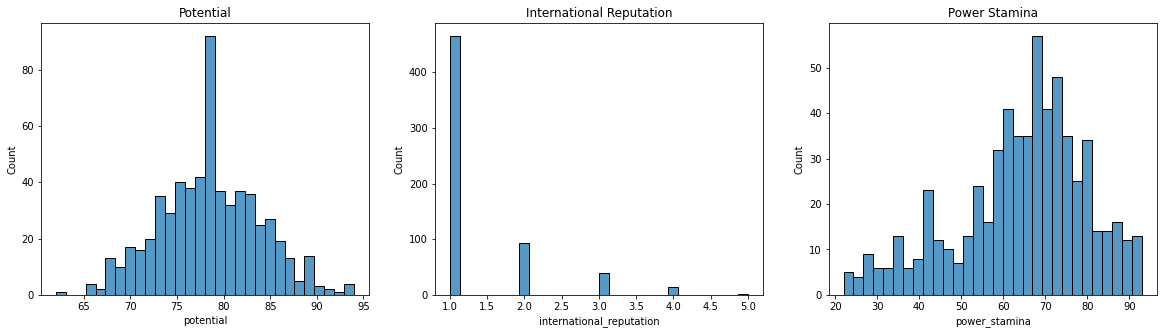

<Figure size 432x288 with 0 Axes>

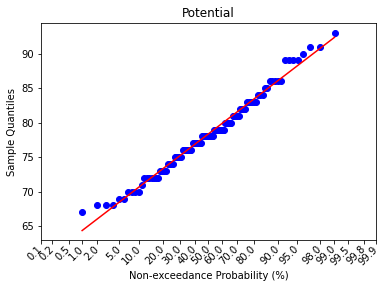

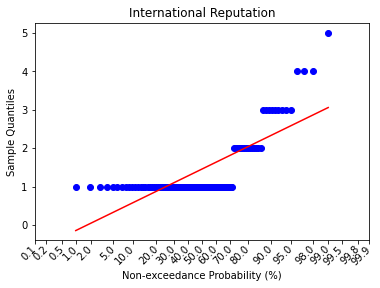

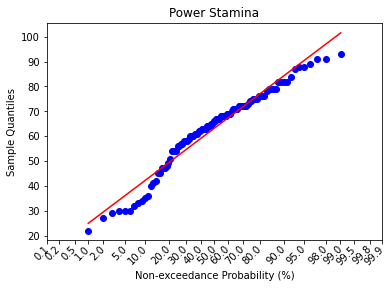

In [241]:
sample = spanish_players_df.sample(n=100)

# histogramas
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(data=spanish_players_df, x="potential", bins=30)
plt.title('Potential')
plt.subplot(1,3,2)
sns.histplot(data=spanish_players_df, x="international_reputation", bins=30)
plt.title('International Reputation')
plt.subplot(1,3,3)
sns.histplot(data=spanish_players_df, x="power_stamina", bins=30)
plt.title('Power Stamina')

# Gráficos probabilisticas
plt.figure()
sm.ProbPlot( sample.potential, dist="norm" ).probplot(line="r")
plt.title('Potential')
sm.ProbPlot( sample.international_reputation, dist="norm" ).probplot(line="r")
plt.title('International Reputation')
sm.ProbPlot( sample.power_stamina, dist="norm" ).probplot(line="r")
plt.title('Power Stamina')


# Pruebas de normalidad
print(" alpha -> 0.05 \n")

print("       Potential:\n")
print( stats.skewtest( sample.potential ) , "\n    -> H0:  El coeficiente de asimetría (CA) de la población sigue una asimetria propia de una población normal (CA = 0)" )
print( stats.kurtosistest( sample.potential ) , "\n    -> H0:  El coeficiente de curtosis (CC) de la población sigue una curtosis propia de una población normal (CC=0)")
print( stats.kstest( (sample.potential-sample.potential.mean())/sample.potential.std(), 'norm'  ) , "\n    -> H0:  La función de distribución acumulada se comporta como la función de distribución acumulada de una distribución normal.")
print( stats.shapiro( sample.potential ) , "\n     -> H0:  La variable aleatoria estudiada procede de una población normal")
print("**Despues de hacer varios tipos de pruebas de normalidad y todas diciendo que la distribución sigue una normal, concluimos que sigue una normal.**\n")

print("\n\n       International Reputation:\n")
print( stats.skewtest( sample.international_reputation ) , "\n    -> H1:  El coeficiente de asimetría (CA) de la población sigue una asimetría diferente de una población normal (CA != 0)" )
print( stats.kurtosistest( sample.international_reputation ) , "\n    -> H1:  El coeficiente de curtosis (CC) de la población tiene una curtosis diferente a la de una población normal (CC!=0)")
print( stats.kstest( (sample.international_reputation-sample.international_reputation.mean())/sample.international_reputation.std(), 'norm'  ) , "\n    -> H1:  La función de distribución acumulada difiere de la función de distribución acumulada de una distribución normal.")
print( stats.shapiro( sample.international_reputation ) , "\n     -> H1:  La variable aleatoria estudiada no procede de una población normal")
print("**Despues de hacer varios tipos de pruebas de normalidad y todas diciendo que la distribución NO sigue una normal, concluimos que NO sigue una normal.**\n")

print("\n\n       Power Stamina:\n")
print( stats.skewtest( sample.power_stamina ) , "\n    -> H1:  El coeficiente de asimetría (CA) de la población sigue una asimetría diferente de una población normal (CA != 0)" )
print( stats.kurtosistest( sample.power_stamina ) , "\n    -> H0:  El coeficiente de curtosis (CC) de la población sigue una curtosis propia de una población normal (CC=0)")
print( stats.kstest( (sample.power_stamina-sample.power_stamina.mean())/sample.power_stamina.std(), 'norm'  ) , "\n    -> H0:  La función de distribución acumulada se comporta como la función de distribución acumulada de una distribución normal.")
print( stats.shapiro( sample.power_stamina ) , "\n     -> H1:  La variable aleatoria estudiada no procede de una población normal")
print("**Despues de hacer varios tipos de pruebas de normalidad, aunque el de asimetría y la de shapiro dicen que la distribución no sigue una normal, observando el gráfico probabilistico y el histograma podemos concluir que sigue una normal.**\n")


# Intervalos de confianza

# Media
print("\n       Media:")
print("Potential")
lower_bound = 0
upper_bound = 0
x = sample.potential.mean()
n = sample.shape[0]
t = stats.t.ppf(0.975, n-1 )
s = sample.potential.std()
lower_bound = x - t * s/math.sqrt(n)
upper_bound = x + t * s/math.sqrt(n)
print("   Hay un 95% de probabilidad de que las muestras tengan una media de entre: (",lower_bound,", ", upper_bound,").")

print("Power Stamina")
lower_bound_1 = 0
upper_bound_1 = 0
x_1 = sample.power_stamina.mean()
n_1 = sample.shape[0]
t_1 = stats.t.ppf(0.975, n_1-1 )
s_1 = sample.power_stamina.std()
lower_bound_1 = x_1 - t_1 * s_1/math.sqrt(n_1)
upper_bound_1 = x_1 + t_1 * s_1/math.sqrt(n_1)
print("   Hay un 95% de probabilidad de que las muestras tengan una media de entre: (",lower_bound_1,", ", upper_bound_1,").")

# Varianza
print("\n       Varianza:")
print("Potential")
lower_bound_2 = 0
upper_bound_2 = 0
n_2 = sample.shape[0]
s2_2 = sample.potential.std()
chi1_2 = stats.chi2.ppf(1-0.05/2, n_2 - 1 )
chi2_2 = stats.chi2.ppf(0.05/2, n_2 - 1 )
lower_bound_2 = (n_2-1)*s2_2/chi1_2
upper_bound_2 = (n_2-1)*s2_2/chi2_2
print("   Hay un 95% de probabilidad de que las muestras tengan una varianza de entre: (",lower_bound_2,", ", upper_bound_2,").")

print("Power Stamina")
lower_bound_3 = 0
upper_bound_3 = 0
n_3 = sample.shape[0]
s2_3 = sample.power_stamina.std()
chi1_3 = stats.chi2.ppf(1-0.05/2, n_3 - 1 )
chi2_3 = stats.chi2.ppf(0.05/2, n_3 - 1 )
lower_bound_3 = (n_3-1)*s2_3/chi1_3
upper_bound_3 = (n_3-1)*s2_3/chi2_3
print("   Hay un 95% de probabilidad de que las muestras tengan una varianza de entre: (",lower_bound_3,", ", upper_bound_3,").")

